![HenryLogo](https://d31uz8lwfmyn8g.cloudfront.net/Assets/logo-henry-white-lg.png)

# **Proyecto integrador**

### 3. Modelamiento

Una vez preparados los datos, se procederá con el modelamiento. Recuerden que el objetivo es clasificar a un paciente como hospitalizado o no hospitalizado, teniendo en cuenta un data set que contiene información referente a antecedentes del paciente, morbilidad asociada al paciente y antecedentes relacionados con la toma de la biopsia y complicaciones infecciosas.




In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
sns.set()
from sklearn.model_selection import train_test_split

Carguen la base de datos preparada desde la fase 2.

In [ ]:
# Se lee el archivo generado al final de la preparación de datos

df = pd.read_csv("C:/Users/guard/OneDrive/Desktop/Henry Data Science/M6/Proyecto_Integrador/Proyecto Integrador M6/Data/BBDD_Hospitalización.csv", sep=",")
df.head()

,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC,BIOPSIA_NEG,BIOPSIA_POS,FIEBRE_SI,ITU_SI,HOSPITALIZACION_SI,PATRON DE RESISTENCIA_SI
0,0.111111,0.166667,0.0,True,False,True,False,True,False
1,0.111111,0.416667,0.0,True,False,True,False,True,False
2,0.111111,0.333333,1.0,True,False,True,False,True,True
3,0.111111,0.416667,0.0,True,False,True,False,True,False
4,0.111111,0.333333,1.0,True,False,True,False,True,False


Separen el dataset en X, y (variable objetivo)

In [3]:
# Separar las características (X) y la variable objetivo (y)

X = df [['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA', 'DIAS HOSPITALIZACION MQ', 'DIAS HOSPITALIZACIÓN UPC', 'BIOPSIA_NEG', 'BIOPSIA_POS', 'FIEBRE_SI', 'ITU_SI', 'PATRON DE RESISTENCIA_SI']]
y = df[['HOSPITALIZACION_SI']]

Separen el dataset en X_train, X_test, y_train y y_test

In [4]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Instancien, entrenen y predigan sobre un árbol de decisión asignando una profundidad máxima arbitraria

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score

In [6]:
# Instanciar el árbol de decisión
tree_classifier = DecisionTreeClassifier(max_depth=None, random_state=42)

In [7]:
# Entrenar el modelo
tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [8]:
# Hacer predicciones de entrenamiento
y_train_pred = tree_classifier.predict(X_train)

In [9]:
# Hacer predicciones de test
y_test_pred = tree_classifier.predict(X_test)

Realicen la matriz de confusión para este modelo. Se recomienda utilizar mapa de calor para la visualización. 

In [10]:
matrix_train = confusion_matrix(y_train, y_train_pred)
matrix_test = confusion_matrix(y_test, y_test_pred)

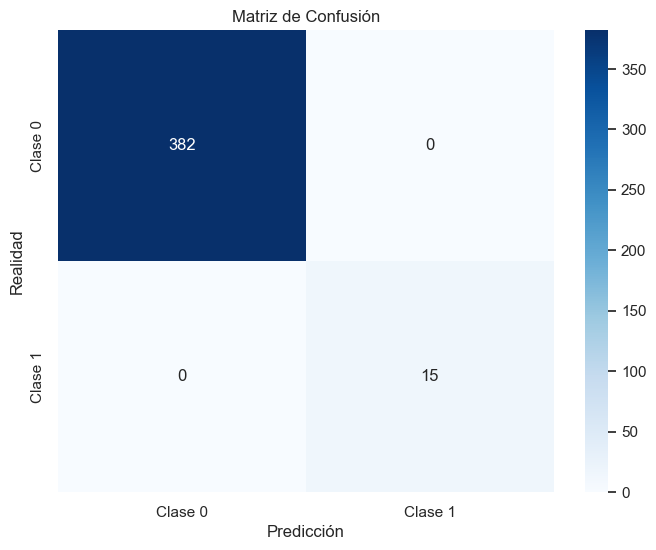

In [11]:
# Mapa de calor matriz con datos de entrenamiento

# Definir los nombres de las clases
class_names = ['Clase 0', 'Clase 1']

# Crear un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(matrix_train, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)

# Configurar etiquetas y título
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.title('Matriz de Confusión')
plt.show()

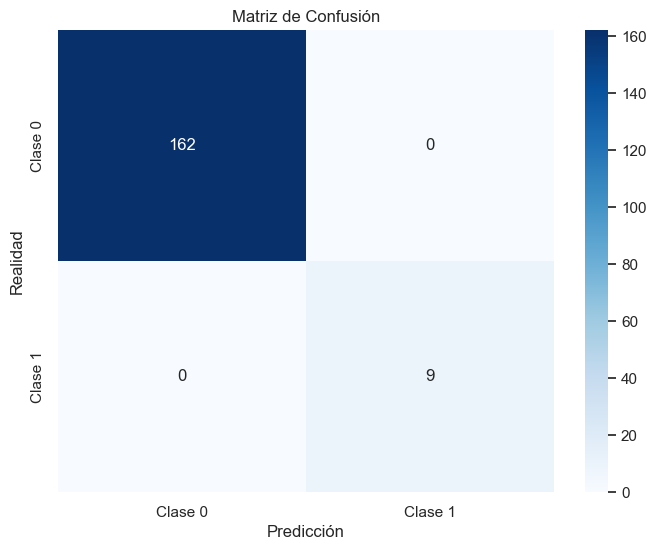

In [12]:
# Mapa de calor matriz con datos de testeo

# Definir los nombres de las clases
class_names = ['Clase 0', 'Clase 1']

# Crear un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(matrix_test, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)

# Configurar etiquetas y título
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.title('Matriz de Confusión')
plt.show()

Seleccione tres métricas de evaluación para este modelo de clasificación y describa el significado de cada una de ellas para el modelo creado.

In [13]:
# Evaluar el modelo
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average = 'macro')
class_report = classification_report(y_test, y_test_pred)

# Mostrar resultados
print(f"Accuracy: {accuracy:.2f}")
print("Precision Score:")
print(precision)
print("Classification Report:")
print(class_report)

Accuracy: 1.00
Precision Score:
1.0
Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       162
        True       1.00      1.00      1.00         9

    accuracy                           1.00       171
   macro avg       1.00      1.00      1.00       171
weighted avg       1.00      1.00      1.00       171



Realice un diagrama de la importancia de cada variable respecto a la clasificación de la variable objetivo

C:\Users\guard\AppData\Local\Temp\ipykernel_22428\4147032273.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


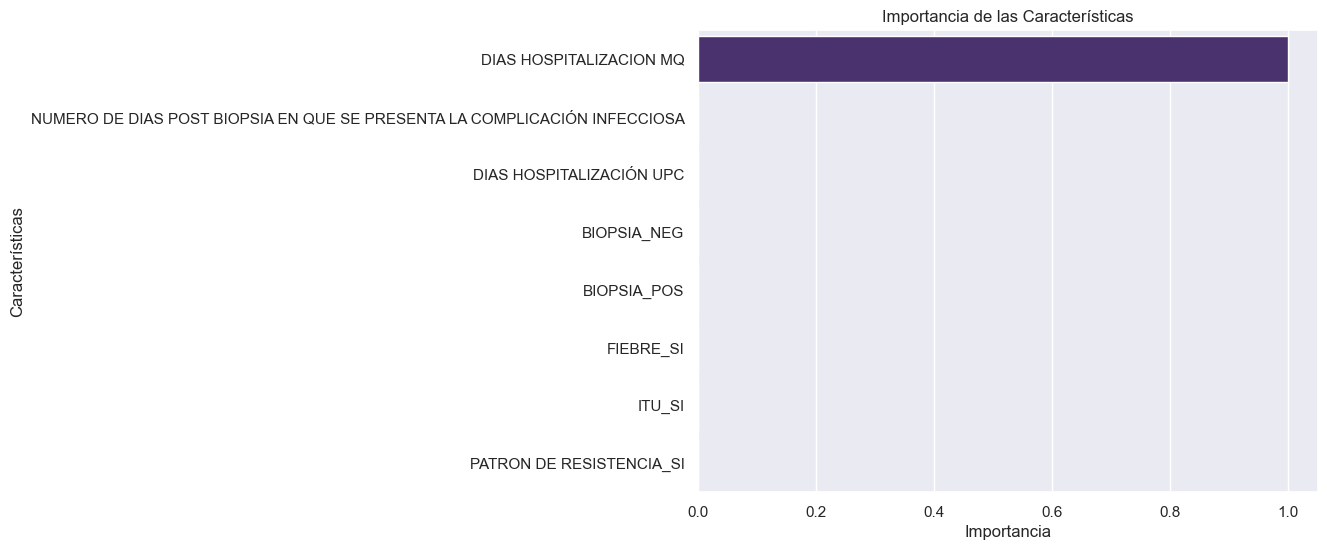

In [14]:
# Obtener la importancia de las características
importances = tree_classifier.feature_importances_

# Crear un DataFrame para visualizar la importancia
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Ordenar el DataFrame por importancia
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualizar la importancia de las características
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Importancia de las Características')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.show()

Encuentre cuál sería un valor óptimo para el hiperparámetro **max_depth** para el árbol de decisión. Construya un modelo con este valor y compare las métricas de evaluación respecto al modelo creado con una profundidad arbitraria. 

In [15]:
from sklearn.model_selection import GridSearchCV

# Definir los parámetros a ajustar
param_grid = {'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

# Instanciar el árbol de decisión
tree_classifier = DecisionTreeClassifier(random_state=42)

# Instanciar GridSearchCV
grid_search = GridSearchCV(tree_classifier, param_grid, cv=5, scoring='accuracy')

# Ajustar el modelo
grid_search.fit(X_train, y_train)

# Mostrar los mejores parámetros
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor precisión:", grid_search.best_score_)

Mejores parámetros: {'max_depth': None}
Mejor precisión: 0.9949999999999999


In [16]:
from sklearn.model_selection import cross_validate
from IPython.display import clear_output

In [17]:
tree_train_scores_mean = []
tree_train_scores_std = []
tree_test_scores_mean = []
tree_test_scores_std = []

profundidades = np.arange(1,30,1)
i = 0
i_max = len(profundidades)
for profundidad in profundidades:
    i = i + 1
    clf = DecisionTreeClassifier(max_depth=profundidad)
    tree_scores = cross_validate(clf, X, y, cv=5, return_train_score=True, n_jobs = -1)
    
    tree_train_scores_mean.append(tree_scores['train_score'].mean())
    tree_train_scores_std.append(tree_scores['train_score'].std())
    
    tree_test_scores_mean.append(tree_scores['test_score'].mean())
    tree_test_scores_std.append(tree_scores['test_score'].std())
    
    clear_output(wait=True)
    print('Completado: ' + str(round(i / i_max * 100, 2)) + '%')

tree_train_scores_mean = np.array(tree_train_scores_mean)
tree_train_scores_std = np.array(tree_train_scores_std)
tree_test_scores_mean = np.array(tree_test_scores_mean)
tree_test_scores_std = np.array(tree_test_scores_std)

Completado: 100.0%


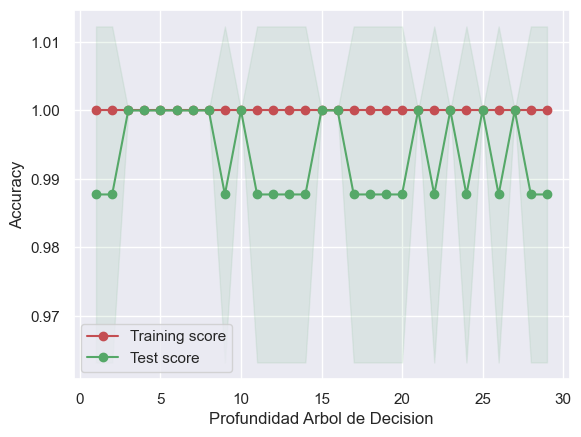

In [18]:
plt.fill_between(profundidades, tree_train_scores_mean - tree_train_scores_std,
                 tree_train_scores_mean + tree_train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(profundidades, tree_test_scores_mean - tree_test_scores_std,
                 tree_test_scores_mean + tree_test_scores_std, alpha=0.1, color="g")

plt.plot(profundidades, tree_train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(profundidades, tree_test_scores_mean, 'o-', color="g",
         label="Test score")

plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Profundidad Arbol de Decision')
plt.show()

Según lo observado el mejor modelo es el que no posee max_depth, que fue el modelo realizado. Dado a los resultados alcanzados pudiese concluir que las observaciones son pocas y por lo tanto no representativas produciendo que el modelo no pueda generalizar correctamente al ingreso de nuevos datos.

Instancien, entrenen y predigan sobre un modelo de k-vecinos asignando una cantidad de vecinos k-aribitraria. 

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
# Instanciar el modelo KNN con un número arbitrario de vecinos (k)
k = 3  # Iniciaremos con este valor y luego haremos los ajustes
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# Entrenar el modelo
knn_classifier.fit(X_train, y_train)

# Hacer predicciones
y_pred = knn_classifier.predict(X_test)

c:\Users\guard\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Encuentre el valor óptimo para k

In [21]:
knn_train_scores_mean = []
knn_train_scores_std = []
knn_test_scores_mean = []
knn_test_scores_std = []

n_vecinos = np.arange(1,30,1)
i = 0
i_max = len(n_vecinos)
for vecinos in n_vecinos:
    i = i + 1
    clf = KNeighborsClassifier(n_neighbors=vecinos)
    knn_scores = cross_validate(clf, X, y, cv=5, return_train_score=True, n_jobs = -1)
    
    knn_train_scores_mean.append(knn_scores['train_score'].mean())
    knn_train_scores_std.append(knn_scores['train_score'].std())
    
    knn_test_scores_mean.append(knn_scores['test_score'].mean())
    knn_test_scores_std.append(knn_scores['test_score'].std())
    
    clear_output(wait=True)
    print('Completado: ' + str(round(i / i_max * 100, 2)) + '%')

knn_train_scores_mean = np.array(knn_train_scores_mean)
knn_train_scores_std = np.array(knn_train_scores_std)
knn_test_scores_mean = np.array(knn_test_scores_mean)
knn_test_scores_std = np.array(knn_test_scores_std)

Completado: 100.0%


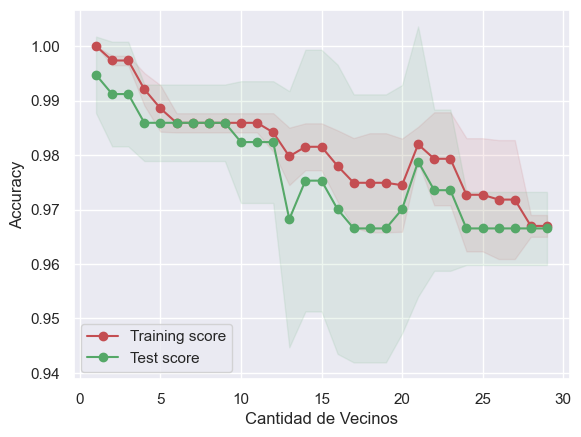

In [22]:
plt.fill_between(n_vecinos, knn_train_scores_mean - knn_train_scores_std,
                 knn_train_scores_mean + knn_train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(n_vecinos, knn_test_scores_mean - knn_test_scores_std,
                 knn_test_scores_mean + knn_test_scores_std, alpha=0.1, color="g")

plt.plot(n_vecinos, knn_train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(n_vecinos, knn_test_scores_mean, 'o-', color="g",
         label="Test score")

plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Cantidad de Vecinos')
plt.show()

Halle las mismas tres métricas de evaluación para este modelo de clasificación y compare los valores para el performance, respecto al árbol de decisión cuyo hiperparámetro **max_depth** se optimizó. ¿Qué puede concluir? 

In [23]:
# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_test_pred, average = 'macro')
classification_report_result = classification_report(y_test, y_pred)

# Mostrar resultados
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report_result)

Accuracy: 0.99
Classification Report:
              precision    recall  f1-score   support

       False       0.99      1.00      1.00       162
        True       1.00      0.89      0.94         9

    accuracy                           0.99       171
   macro avg       1.00      0.94      0.97       171
weighted avg       0.99      0.99      0.99       171



De acuerdo con lo aprendido en el módulo, ¿Cómo cree que se puede mejorar el performance de este modelo? 

R/ Dado el desempeño que se consiguió la mejor manera de optimizar el modelo sería realizando un aumento de los datos, dado el resultado obtenidono tendría sentido optimizar más el número de características y los datos ya se encuentran normalizados otra opción es realizar uso de distancias alternativas y ajustar otros hiperparámetros como el peso de los vecinos, sin embargo, reitero que la mejor opción antes de hacer estas pruebas es aumentar el número de los datos.